In [1]:
!pip install tmdbsimple

In [2]:
import json
with open('/Users/rdrlr/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()


dict_keys(['api-key'])

In [3]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [4]:
## create a movie object using the .Movies function from tmdb
movie = tmdb.Movies(603)
movie

In [5]:
## movie objects have a .info dictionary 
# we are looking for the 3 budget, revenue, cerification (P, PG, etc)
# this is using .info() dictionary 
# once it runs find these 3 items and take a look at them to get an idea what what we are working with
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/giBJ0ezYNEobFBfB8H4JNTjmll.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 78.674,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/at4uYdwAAgNRKhZuuFX8ShKSybw.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film 

In [6]:
# since we are only asked to find 3 pieice of info for each movie in the instructions
# we will use info to check only budget, revenue, cerification (P, PG, etc) as requested
info['budget']

63000000

In [7]:
info['revenue']

463517383

In [8]:
# this will be movie id that we will use later
info['imdb_id']

'tt0133093'

In [9]:
# specify any movie id on top in this case it was Tom and jerry
# ['budget'] of this particual id wil give us the budget for this movie id for tom and jerry
movie = tmdb.Movies('tt1361336')
info = movie.info()
info['budget']

50000000

In [10]:
# the README for the package's repositorys shows how to obtian the certification 
# certification information must be found by connecting to a movie then you will see the certifivstion
# it lets us know to look up releases
releases = movie.releases()

In [11]:
releases

{'id': 587807,
 'countries': [{'certification': 'PG',
   'descriptors': [],
   'iso_3166_1': 'US',
   'primary': False,
   'release_date': '2021-02-26'},
  {'certification': '',
   'descriptors': [],
   'iso_3166_1': 'CO',
   'primary': False,
   'release_date': '2021-02-12'},
  {'certification': 'PG',
   'descriptors': [],
   'iso_3166_1': 'US',
   'primary': False,
   'release_date': '2021-02-26'},
  {'certification': 'ALL',
   'descriptors': [],
   'iso_3166_1': 'KR',
   'primary': False,
   'release_date': '2021-02-24'},
  {'certification': '',
   'descriptors': [],
   'iso_3166_1': 'ID',
   'primary': False,
   'release_date': '2021-03-10'},
  {'certification': '6',
   'descriptors': [],
   'iso_3166_1': 'NL',
   'primary': False,
   'release_date': '2021-06-09'},
  {'certification': 'G',
   'descriptors': [],
   'iso_3166_1': 'IE',
   'primary': False,
   'release_date': '2021-05-07'},
  {'certification': 'M/6',
   'descriptors': [],
   'iso_3166_1': 'PT',
   'primary': False,
  

In [12]:
# example from package README
# here it takes previous query (releases = movie.releases()) and filters for US as requested
# got iso_3166_1 from previous query results under 'certification descriptors'
releases = movie.releases()
for c in releases['countries']:
    if c['iso_3166_1'] == 'US':
        print(c['certification'])

PG
PG
PG


In [13]:
# Get the movie object for the current id
# Instead of printing the certification separately, we want to add that to our dictionary results for movie.info().
# this will create extra columns of us movies 
# we got this info from last few queries
# this will store the 
movie = tmdb.Movies('tt1361336')
# save the .info .releases dictionaries
info = movie.info()
releases = movie.releases()
# Loop through countries in releases
for c in releases['countries']:
    # if the country abbreviation==US
    if c['iso_3166_1' ] =='US':
        ## save a "certification" key in the info dict with the certification
       info['certification'] = c['certification']

In [14]:
def get_movie_with_rating(movie_id):
    
    # Get the movie object for the current id
    movie = tmdb.Movies('tt1361336')
    
    # save the .info .releases dictionaries
    movie_info = movie.info()
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
           movie_info['certification'] = c['certification']
    return movie_info

In [15]:
def get_movie_with_rating(movie_id):
    
    # Get the movie object for the current id
    movie = tmdb.Movies('tt1361336')
    # save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
           info['certification'] = c['certification']

    return info

In [16]:
get_movie_with_rating(id)

{'adult': False,
 'backdrop_path': '/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg',
 'belongs_to_collection': None,
 'budget': 50000000,
 'genres': [{'id': 35, 'name': 'Comedy'},
  {'id': 10751, 'name': 'Family'},
  {'id': 16, 'name': 'Animation'}],
 'homepage': 'https://www.tomandjerrymovie.com',
 'id': 587807,
 'imdb_id': 'tt1361336',
 'original_language': 'en',
 'original_title': 'Tom & Jerry',
 'overview': 'Tom the cat and Jerry the mouse get kicked out of their home and relocate to a fancy New York hotel, where a scrappy employee named Kayla will lose her job if she can’t evict Jerry before a high-class wedding at the hotel. Her solution? Hiring Tom to get rid of the pesky mouse.',
 'popularity': 44.375,
 'poster_path': '/8XZI9QZ7Pm3fVkigWJPbrXCMzjq.jpg',
 'production_companies': [{'id': 25120,
   'logo_path': '/lMj6nMJBOzfLEd2fu8uF530AJcv.png',
   'name': 'Warner Bros. Pictures Animation',
   'origin_country': 'US'},
  {'id': 8922,
   'logo_path': '/yZWehAyjfKi4KvKeg1bkJ1bm5H8.png',
   'name'

In [17]:
test = get_movie_with_rating("tt0848228") #put your function name here
test

{'adult': False,
 'backdrop_path': '/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg',
 'belongs_to_collection': None,
 'budget': 50000000,
 'genres': [{'id': 35, 'name': 'Comedy'},
  {'id': 10751, 'name': 'Family'},
  {'id': 16, 'name': 'Animation'}],
 'homepage': 'https://www.tomandjerrymovie.com',
 'id': 587807,
 'imdb_id': 'tt1361336',
 'original_language': 'en',
 'original_title': 'Tom & Jerry',
 'overview': 'Tom the cat and Jerry the mouse get kicked out of their home and relocate to a fancy New York hotel, where a scrappy employee named Kayla will lose her job if she can’t evict Jerry before a high-class wedding at the hotel. Her solution? Hiring Tom to get rid of the pesky mouse.',
 'popularity': 44.375,
 'poster_path': '/8XZI9QZ7Pm3fVkigWJPbrXCMzjq.jpg',
 'production_companies': [{'id': 25120,
   'logo_path': '/lMj6nMJBOzfLEd2fu8uF530AJcv.png',
   'name': 'Warner Bros. Pictures Animation',
   'origin_country': 'US'},
  {'id': 8922,
   'logo_path': '/yZWehAyjfKi4KvKeg1bkJ1bm5H8.png',
   'name'

___

In [42]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, time
from tqdm.notebook import tqdm_notebook

In [43]:
import json
with open('/Users/rdrlr/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['api-key'])

In [44]:
# Importing tmdbsimple and setting the API_KEY
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [45]:
# Create the folder for saving files (if it doesn't exist)
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_tmdb_data_2000.csv.gz',
 'IMDB Movie Dataset Info.docx',
 'title-akas-us-only.csv',
 'title.basics.tsv.gz',
 'title.ratings.tsv.gz',
 'Title_Basics.csv',
 'Title_ratings.csv',
 'tmdb_api.json',
 'tmdb_api_results_2000.json']

In [46]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [47]:
basics = pd.read_csv('Data/Title_Basics.csv')
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama
...,...,...,...,...,...,...,...,...,...
86974,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019.0,NaN,74,Drama
86975,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,NaN,97,"Comedy,Drama,Fantasy"
86976,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,NaN,51,Drama
86977,tt9916190,movie,Safeguard,Safeguard,0,2020.0,NaN,95,"Action,Adventure,Thriller"


In [48]:
YEARS_TO_GET = [2000,2001]

In [77]:
# Start of Outer loop
for YEAR in tqdm_notebook(YEARS_TO_GET,desc='YEARS',position=0):
    # Define the JSON file to store results for the year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if the JSON file exists
    file_exists = os.path.isfile(JSON_FILE)
     
    # If it does not exist: create it
    if file_exists == False:
    # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)

    # Filtering for movies from selected startYear
    df = basics.loc[ basics['startYear']==YEAR].copy()

    # saving movie ids to list
    movie_ids = df['tconst'].copy()#.to_list
    movie_ids

    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    previous_df

    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    # Get index and movie id from list
    # INNER LOOP

for movie_id in tqdm_notebook(movie_ids_to_get, 
                            desc=f'Movies from {YEAR}',
                            position=1,
                            leave=True):
    # Attempt to retrieve then data for the movie id
    try:
        temp = get_movie_with_rating(movie_id)  #This uses your pre-ma    de function
        # Append/extend results to existing file using a pre-made function
        write_json(temp,JSON_FILE)
        # Short 20 ms sleep to prevent overwhelming server
        time.sleep(0.02)

    # If it fails,  make a dict with just the id and None for certification.
    except Exception as e:
        continue

    # Save the final results to a csv.gz file
    final_year_df = pd.read_json(JSON_FILE)
                
    csv_fname = f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz"
    final_year_df.to_csv(csv_fname, compression="gzip", index=False)

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2001:   0%|          | 0/1576 [00:00<?, ?it/s]

# EDA

In [78]:
# Load the data from your .csv.gz file into a new DataFrame.
df = pd.read_csv(csv_fname)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1356 non-null   object 
 1   adult                  1355 non-null   float64
 2   backdrop_path          754 non-null    object 
 3   belongs_to_collection  100 non-null    object 
 4   budget                 1355 non-null   float64
 5   genres                 1355 non-null   object 
 6   homepage               106 non-null    object 
 7   id                     1355 non-null   float64
 8   original_language      1355 non-null   object 
 9   original_title         1355 non-null   object 
 10  overview               1330 non-null   object 
 11  popularity             1355 non-null   float64
 12  poster_path            1229 non-null   object 
 13  production_companies   1355 non-null   object 
 14  production_countries   1355 non-null   object 
 15  rele

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.3,1243.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.5,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.4,132.0,PG-13


## How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [79]:
filter_budget = df['budget'] >0
filter_budget.sum()

300

In [80]:
filter_revenue = df['revenue'] >0
filter_revenue.sum()

243

In [81]:
filter_financial = filter_revenue & filter_budget
filter_financial.sum()

195

In [82]:
# Remove any movies with 0's for budget AND revenue from the remaining visualizations.
df = df[filter_financial]
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.300,1243.0,PG-13
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.400,132.0,PG-13
9,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.700,2609.0,R
10,tt0120737,0.0,/x2RS3uTcsJJ9IfjNPcgDmukoEcQ.jpg,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120.0,en,The Lord of the Rings: The Fellowship of the Ring,...,871368364.0,179.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,0.0,8.406,23622.0,PG-13
12,tt0120824,0.0,/gnyGSoVKOIz1BR34lIBuuTq0Znl.jpg,NaN,38000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.miramax.com/movie/the-shipping-news,6440.0,en,The Shipping News,...,24690441.0,111.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You'll never guess what you'll find inside...,The Shipping News,0.0,6.300,342.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,tt0294289,0.0,NaN,NaN,344.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.americanadobo.com,50819.0,tl,American Adobo,...,342855.0,104.0,"[{'english_name': 'Tagalog', 'iso_639_1': 'tl'...",Released,Sex is the appetizer. Love is the main course....,American Adobo,0.0,4.400,7.0,NaN
1054,tt0296042,0.0,/aw0EeseSr10dVUuY6Aiv6HhP8UW.jpg,"{'id': 1175577, 'name': 'Ichi Collection', 'po...",1400010.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,9696.0,ja,殺し屋1,...,80631.0,129.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,Love really hurts.,Ichi the Killer,0.0,7.000,871.0,NaN
1165,tt0310790,0.0,/hAvu0oWrEbbPN71QC8w1NIoUYQT.jpg,"{'id': 518467, 'name': 'El Bosque Animado', 'p...",3747230.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,49612.0,gl,O Bosque Animado,...,482902.0,83.0,"[{'english_name': 'Galician', 'iso_639_1': 'gl...",Released,NaN,The Living Forest,0.0,5.400,23.0,PG
1276,tt0445841,0.0,/lO3XAxV38SC7ZuuNVdy6E6nOZac.jpg,NaN,12500000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,233308.0,cn,一個爛賭的傳說,...,123021750.0,94.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,A Gambler's Story,0.0,6.800,3.0,NaN


In [83]:
print(f"There are {len(df)} movies with valid budget/revenue.")

There are 195 movies with valid budget/revenue.


## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

R        71
PG-13    60
NaN      42
PG       15
G         5
NR        2
Name: certification, dtype: int64

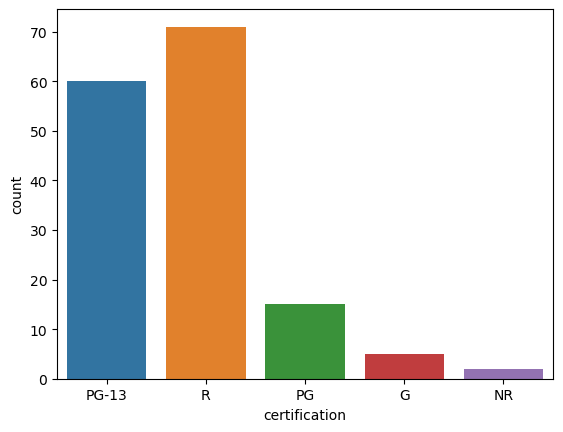

In [84]:
sns.countplot(data=df, x='certification');
df['certification'].value_counts(dropna=False)

## What is the average revenue per certification category?

certification
G       $ 177,814,925
NR       $ 10,833,596
PG      $ 148,144,228
PG-13   $ 103,238,231
R        $ 53,797,953
Name: revenue, dtype: float64

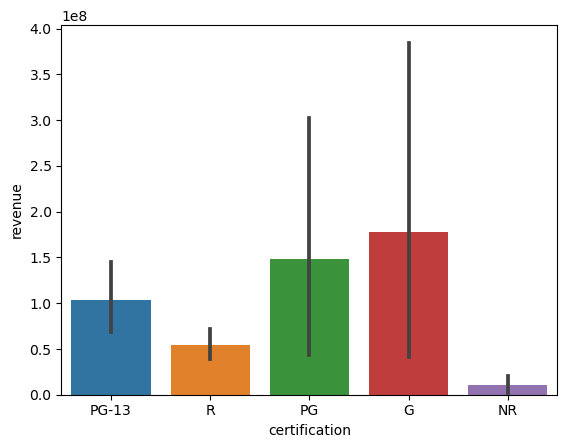

In [85]:
with pd.option_context('display.float_format',lambda x: f"$ {x:,.0f}"):
    display(df.groupby('certification')['revenue'].mean())

sns.barplot(data=df, x='certification', y='revenue');

## What is the average budget per certification category?

certification
G       $ 42,400,000
NR       $ 5,050,000
PG      $ 49,539,815
PG-13   $ 44,631,623
R       $ 29,363,156
Name: budget, dtype: float64

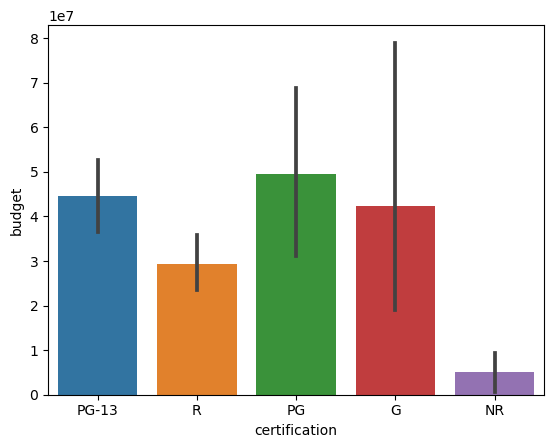

In [86]:
with pd.option_context('display.float_format',lambda x: f"$ {x:,.0f}"):
    display(df.groupby('certification')['budget'].mean())

sns.barplot(data=df, x='certification', y='budget');

In [87]:
import glob
# Use glob to get all filepaths that match the pattern (*=wildcard)
tmdb_files = sorted(glob.glob("Data/final_tmdb_data*.csv.gz"))
tmdb_files


['Data\\final_tmdb_data_2000.csv.gz', 'Data\\final_tmdb_data_2001.csv.gz']

In [88]:
import glob
# Use glob to get all filepaths that match the pattern (*=wildcard)
tmdb_files = sorted(glob.glob("Data/final_tmdb_data*.csv.gz"))
tmdb_files


['Data\\final_tmdb_data_2000.csv.gz', 'Data\\final_tmdb_data_2001.csv.gz']